In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format


In [198]:
nyc_crime = pd.read_excel('crime_data_new_york_by_city_2013.xls', skiprows = 4, skip_footer=3)

In [199]:
nyc_crime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [200]:
nyc_crime.shape

(348, 13)

In this dataset, we have 348 rows and 13 columns.

The column names need to be changed in this dataset.

In [201]:
nyc_crime.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [202]:
nyc_crime.rename(columns={'Murder and\nnonnegligent\nmanslaughter':'murder_nonnegligent_manslaughter'
                          ,'Rape\n(revised\ndefinition)1':'rape_revised_definition1'
                          ,'Rape\n(legacy\ndefinition)2':'rape_legacy_definition2'
                          ,'Aggravated\nassault':'assault'
                          ,'Property\ncrime':'property_crime'
                          ,'Larceny-\ntheft': 'larceny_theft'
                          ,'Violent\ncrime' : 'violent_crime'
                          , 'Motor\nvehicle\ntheft': 'Motor_vehicle_theft'}
                 , inplace=True)

In [203]:
nyc_crime.columns = nyc_crime.columns.str.lower()

In [204]:
nyc_crime.columns

Index(['city', 'population', 'violent_crime',
       'murder_nonnegligent_manslaughter', 'rape_revised_definition1',
       'rape_legacy_definition2', 'robbery', 'assault', 'property_crime',
       'burglary', 'larceny_theft', 'motor_vehicle_theft', 'arson3'],
      dtype='object')

The column 'rape_revised_definition1' seems to have all null values.

In [205]:
nyc_crime['rape_revised_definition1'].isnull().value_counts()

True    348
Name: rape_revised_definition1, dtype: int64

In [206]:
nyc_crime.isnull().sum()

city                                  0
population                            0
violent_crime                         0
murder_nonnegligent_manslaughter      0
rape_revised_definition1            348
rape_legacy_definition2               0
robbery                               0
assault                               0
property_crime                        0
burglary                              0
larceny_theft                         0
motor_vehicle_theft                   0
arson3                              161
dtype: int64

So we can drop the column 'rape_revised_definition1'. And since we will have only one column related to word 'rape', we can rename our column  'rape_legacy_definition2' to a shorter name say 'rape'.

In [207]:
nyc_crime.drop('rape_revised_definition1', axis= 1, inplace=True)
nyc_crime.rename(columns={'rape_legacy_definition2':'rape',
                         'murder_nonnegligent_manslaughter':'murder'}
                , inplace=True)

In [208]:
nyc_crime.head()

,city,population,violent_crime,murder,rape,robbery,assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,nan


In [209]:
print(nyc_crime[['robbery','murder','population','property_crime']].describe())

        robbery  murder  population  property_crime
count   348.000 348.000     348.000         348.000
mean     72.902   1.566   40037.632         792.606
std    1031.033  18.304  450037.368        7659.725
min       0.000   0.000     526.000           0.000
25%       0.000   0.000    3003.000          40.500
50%       1.000   0.000    7233.500         112.500
75%       5.000   0.000   18427.500         341.000
max   19170.000 335.000 8396126.000      141971.000


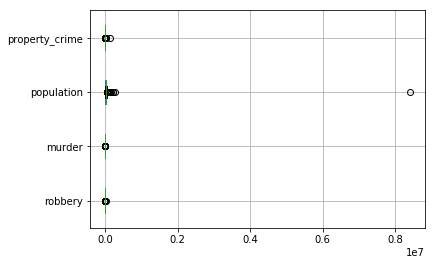

In [210]:
nyc_crime[['robbery','murder','population','property_crime']].boxplot(vert=False)
plt.show()

In [211]:
nyc_crime[nyc_crime.population == 8396126]

,city,population,violent_crime,murder,rape,robbery,assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434,nan


In [212]:
nyc_crime = nyc_crime[nyc_crime.population != 8396126]

In [213]:
print('Data falling below 1 percentile : ')
print(nyc_crime[nyc_crime.population < np.percentile(nyc_crime.population,1)]['population'])
print()
print('Data falling above 99th percentile : ')
print(nyc_crime[nyc_crime.population > np.percentile(nyc_crime.population,99)]['population'])

stats.mstats.winsorize(nyc_crime.population, limits=0.01, inplace= True)


Data falling below 1 percentile : 
12     658
118    526
136    656
319    615
Name: population, dtype: int64

Data falling above 99th percentile : 
35     258789
272    210562
310    143834
346    199134
Name: population, dtype: int64


masked_array(data = [  1861   2577   2846  97956   6388   4089   1781 118296   9519  18182
   2053   4523    658   2522  27270   3333   7473   5418  15374   5733
  17627  34243  46304   1410  12001   1022   2325   2054   2065   2358
   7976  36689   8284   6390   1174 143834   6577   1854   2219  24165
  10470   4704   2246   6794    762  34462   3481   3862    980   3749
   2732   1835   1733  78361   7990   5016  29571  80705   2049   4503
   7458  16179  78215   1827  11087   2978   9543  19331   9264   8180
   3209   4605   7827   2985  15189   1628  22681   1122  11021   2191
   1913  12329  13774  19800  29315  16470  19674   1104   6596   3036
   7684   4124   5144  28921   4079   5948  13122  16292   5335  12109
  20435  15926   2842   2265   5033   2579   1702  10988  43214   1960
  11739  22596  28468  10442   7891  13194   1926  27134    658  14582
  21839  15315   5400   2663   2498   2794  96667  44787   1553   2621
   4065   3118   2381  33805  45535   9517    658  27876 

In [214]:
print(nyc_crime[['robbery','murder','population','property_crime']].describe())

       robbery  murder  population  property_crime
count  347.000 347.000     347.000         347.000
mean    17.867   0.605   15274.248         385.752
std     94.972   3.707   22311.065        1034.369
min      0.000   0.000     658.000           0.000
25%      0.000   0.000    2997.000          40.000
50%      1.000   0.000    7187.000         112.000
75%      5.000   0.000   18160.500         340.500
max   1322.000  47.000  143834.000       12491.000


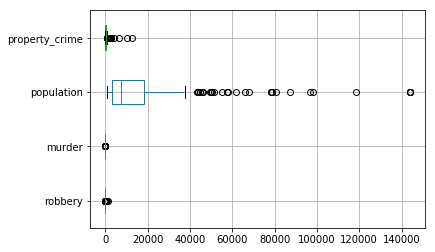

In [215]:
nyc_crime[['robbery','murder','population','property_crime']].boxplot(vert=False)
plt.show()

After winsorizing, when we plotted the population column, we see more outliers in the above boxplot.
How to proceed?

In [217]:
df_wide = nyc_crime[['robbery','property_crime','murder','population']]
df_long = pd.melt(df_wide, id_vars = 'property_crime')

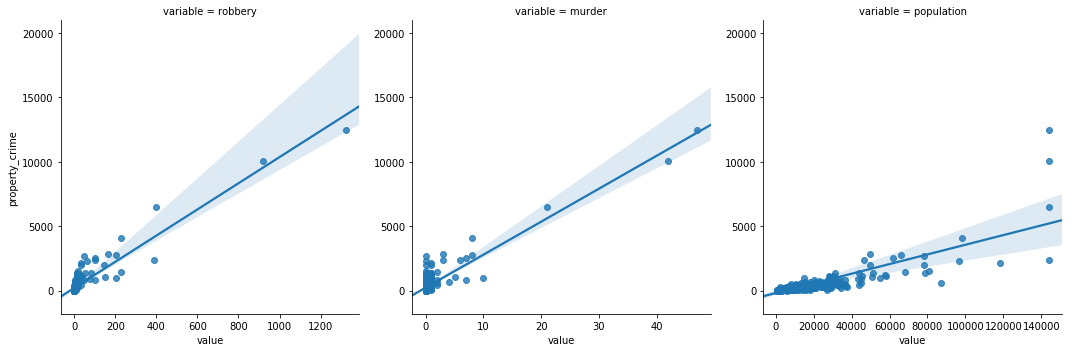

In [218]:
sns.lmplot(data = df_long,  x= 'value', y='property_crime', col= 'variable', sharex=False )
plt.show()

In [175]:
nyc_crime['population2'] = nyc_crime.population * nyc_crime.population

In [176]:
nyc_crime['murder_cat'] = np.where(nyc_crime.murder >= 1 , 1, 0)
nyc_crime['robbery_cat'] = np.where(nyc_crime.robbery >= 1 , 1, 0)

In [196]:
nyc_crime.head()

,city,population,violent_crime,murder,rape,robbery,assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3,mur_rob,population2,murder_cat,robbery_cat
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.000,0,3463321,0,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.000,0,6640929,0,0
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.000,0,8099716,0,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,nan,235,9595377936,1,1
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,nan,4,40806544,0,1
